In [1]:
##############################################
# Modeling    
##############################################
 
from tensorflow.keras import layers, models
from sklearn import preprocessing 

def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential() 
    """ Keras 모델 시작 """

    model.add(layers.Dense(Nh, activation = 'relu', input_shape = (Nin,))) 
    """입력 계층 노드 수 Nin 개,  은닉 계층의 노드 수 Nh 개, 활성함수는 relu  """

    model.add(layers.Dense(Nout, activation = 'relu')) 
    """출력 노드 수 Nout 개,  활성함수는  relu) """

    model.compile(loss = 'mse', optimizer = 'sgd') 
    """ cost함수 - mse – 평균 제곱 오차  최적화  알고리즘 -SGD(확률적 경사하강법) 
    """

    return model



57026/57026 [==============================] - 0s 2us/step
(404, 13) (404,)
Epoch 1/100

4/4 - 1s - loss: 562.1718 - val_loss: 582.2266 - 548ms/epoch - 137ms/step
Epoch 2/100
4/4 - 0s - loss: 494.7774 - val_loss: 504.3954 - 35ms/epoch - 9ms/step
Epoch 3/100
4/4 - 0s - loss: 396.1384 - val_loss: 154.6489 - 37ms/epoch - 9ms/step
Epoch 4/100
4/4 - 0s - loss: 106.0581 - val_loss: 82.6096 - 31ms/epoch - 8ms/step
Epoch 5/100
4/4 - 0s - loss: 78.4688 - val_loss: 68.5716 - 30ms/epoch - 7ms/step
Epoch 6/100
4/4 - 0s - loss: 63.5684 - val_loss: 61.8219 - 32ms/epoch - 8ms/step
Epoch 7/100
4/4 - 0s - loss: 55.0328 - val_loss: 54.1181 - 31ms/epoch - 8ms/step
Epoch 8/100
4/4 - 0s - loss: 51.9129 - val_loss: 54.3605 - 41ms/epoch - 10ms/step
Epoch 9/100
4/4 - 0s - loss: 46.9433 - val_loss: 57.0153 - 41ms/epoch - 10ms/step
Epoch 10/100
4/4 - 0s - loss: 45.9534 - val_loss: 53.3598 - 58ms/epoch - 15ms/step
Epoch 11/100
4/4 - 0s - loss: 43.1296 - val_loss: 70.1505 - 73ms/epoch - 18ms/step
Epoch 12/100
4

4/4 - 0s - loss: 27.9357 - val_loss: 22.0252 - 56ms/epoch - 14ms/step
Epoch 92/100
4/4 - 0s - loss: 24.0135 - val_loss: 34.5044 - 31ms/epoch - 8ms/step
Epoch 93/100
4/4 - 0s - loss: 31.3051 - val_loss: 21.2007 - 50ms/epoch - 13ms/step
Epoch 94/100
4/4 - 0s - loss: 21.7968 - val_loss: 23.6522 - 44ms/epoch - 11ms/step
Epoch 95/100
4/4 - 0s - loss: 24.0135 - val_loss: 23.0362 - 58ms/epoch - 14ms/step
Epoch 96/100
4/4 - 0s - loss: 22.5893 - val_loss: 25.3690 - 33ms/epoch - 8ms/step
Epoch 97/100
4/4 - 0s - loss: 23.6009 - val_loss: 23.3090 - 31ms/epoch - 8ms/step
Epoch 98/100
4/4 - 0s - loss: 22.8249 - val_loss: 27.6625 - 31ms/epoch - 8ms/step
Epoch 99/100
4/4 - 0s - loss: 29.3068 - val_loss: 31.7740 - 60ms/epoch - 15ms/step
Epoch 100/100
4/4 - 0s - loss: 24.8190 - val_loss: 20.5796 - 52ms/epoch - 13ms/step
2/2 [==============================] - 0s 3ms/step - loss: 22.1223

Test Loss -> 22.12


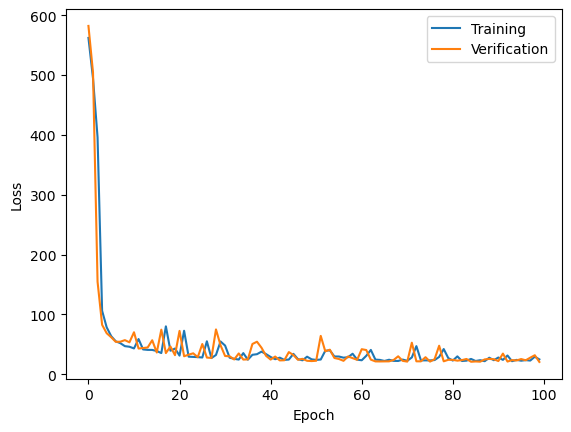

In [3]:


##############################################
# Data  학습과 평가용 데이터 불러오기 
##############################################

from tensorflow.keras import datasets

def Data_func():  
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data() 
    '''총 506건의 보스턴 집 값과 관련된 13가지 정보. '''
    '''학습 데이터와 테스트 데이터로 읽어오기 '''
    
    scaler = preprocessing.MinMaxScaler()  # 데이터 정규화 (0~1 사이)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    print (X_train.shape, y_train.shape )
    
    return (X_train, y_train), (X_test, y_test)

##############################################
# Plotting  결과 그래프 구현 
##############################################
import matplotlib.pyplot as plt
%matplotlib inline 
##############################################
# Main  회귀 ANN 학습 및 성능 분석 
##############################################
def main():
    Nin = 13 #입력층 13개
    Nh = 5   #은닉층 5개
    Nout = 1 #출력층 1개

    model = ANN_seq_func(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, y_train, epochs = 100 , batch_size=100, \
                        validation_split = 0.2, verbose = 2 )
    '''학습 데이터를 100개씩 학습, 총 데이터셋 학습을 15번 반복(epochs=15).
    검증 데이터셋 비율은 0.2 사용'''
    
    performace_test = model.evaluate (X_test, y_test , batch_size=100)
    '''평가 데이터를 100개씩 평가'''
    
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    history = history.history

    """Cost/Loss  변화 추이 그래프"""
    plt.plot(history['loss'] )
    plt.plot(history['val_loss'] )
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()


if __name__ == '__main__':
    main()
